In [1]:
# Импортируем библиотеки
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

200


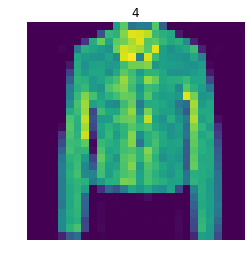

In [26]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
targets_train = train_labels[0:200]
features_train = train_images[0:200]
print(len(features_train))
targets_test = test_labels
features_test = test_images

featuresTrain = torch.from_numpy(features_train)/10
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) 

# Аналогично для тестового датасета.
featuresTest = torch.from_numpy(features_test)/255
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size == размер батча, epoch == количество эпох обучения и iteration == количество итераций
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Датасет в Pytorch 
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# создадим загрузчик данных в PyTorch - data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# Визуализируем одно из изображений
plt.imshow(features_test[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_test[10]))
plt.savefig('graph.png')
plt.show()


In [27]:
# Импорт библиотек
import torch
import torch.nn as nn
from torch.autograd import Variable

In [28]:
# Создание ANN модели
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Линейная функция 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Не линейная функция 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Линейная функция 1
        out = self.fc1(x)
        # Не линейная функция 1
        out = self.relu1(out)
        
        # Линейная функция 2
        out = self.fc2(out)
        # Не линейная функция 2
        out = self.relu1(out)
        
        # Линейная функция 2
        out = self.fc3(out)
        # Не линейная функция 2
        out = self.elu3(out)
        
        # Линейная функция 4 (readout)
        out = self.fc4(out)
        return out

# Зададим параметры сети ANN
input_dim = 28*28
hidden_dim = 40 #Размерности скрытых слоев это гиперпараметры которые настраиваются во время обучения. 150 было выбрано произвольно
output_dim = 10

# Создадим экземпляр ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Зададим loss функцию как кросс энтропию
error = nn.CrossEntropyLoss()

# SGD оптимизатор
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
# Обучение модели
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        train = train.float()
        labels = Variable(labels)
        
        # Обнулим градиенты
        optimizer.zero_grad()
        #print(train..float())
        # Проведем forward propagation
        outputs = model(train)
        
        # Посчитаем loss функцию 
        loss = error(outputs, labels)
        
        # Расчитаем градиенты
        loss.backward()
        
        # Обновим параметры сети
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Подсчет точности        
            correct = 0
            total = 0
            # Работа с тестовым датасетом
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                test = test.float()
                # Проведем Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # Сохраним loss и iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Выведем Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.003168408526107669  Accuracy: 59.290000915527344 %
Iteration: 1000  Loss: 0.0010611999314278364  Accuracy: 61.439998626708984 %
Iteration: 1500  Loss: 0.0006013738457113504  Accuracy: 62.31999969482422 %
Iteration: 2000  Loss: 0.0004095217154826969  Accuracy: 63.119998931884766 %
Iteration: 2500  Loss: 0.0003062324831262231  Accuracy: 63.380001068115234 %
Iteration: 3000  Loss: 0.00024269793357234448  Accuracy: 63.91999816894531 %
Iteration: 3500  Loss: 0.0001998835796257481  Accuracy: 64.22000122070312 %
Iteration: 4000  Loss: 0.0001691268989816308  Accuracy: 64.5 %
Iteration: 4500  Loss: 0.00014614558313041925  Accuracy: 64.62999725341797 %
Iteration: 5000  Loss: 0.00012836112000513822  Accuracy: 64.80999755859375 %
Iteration: 5500  Loss: 0.00011413673928473145  Accuracy: 64.91000366210938 %
Iteration: 6000  Loss: 0.00010257430403726175  Accuracy: 65.05999755859375 %


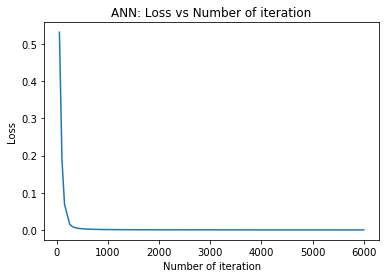

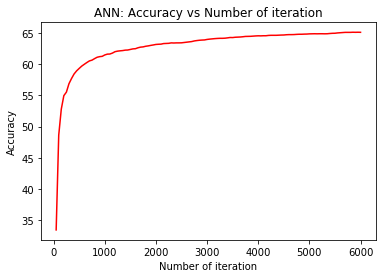

In [30]:
# Визуализация loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# Визуализация accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()